<a href="https://colab.research.google.com/github/aditipatelpro/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

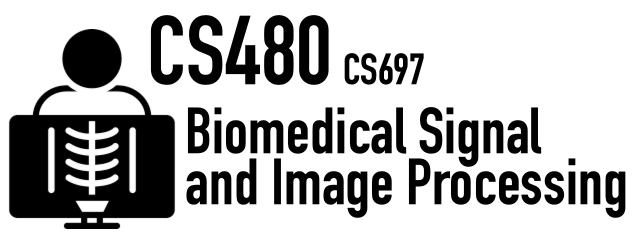
# Assignment 1


In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [7]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [4]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

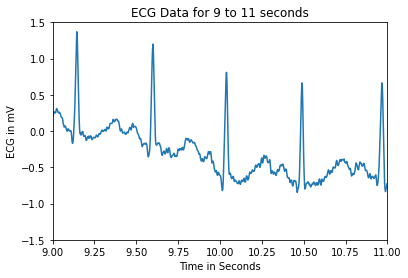

In [36]:
#Solution 1
time_in_seconds = np.arange(ecg.size) / SAMPLING_RATE
plt.xlim([9,11])
plt.ylim([-1.5,1.5])
plt.xlabel("Time in Seconds")
plt.ylabel("ECG in mV")
plt.title("ECG Data for 9 to 11 seconds")
plt.plot(time_in_seconds, ecg)

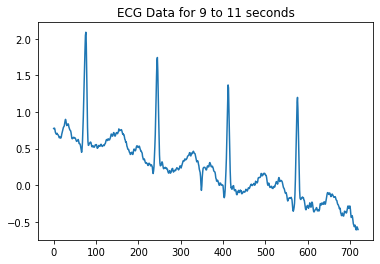

In [37]:
#Solution 2
dataOf9to11Seconds = ecg[SAMPLING_RATE*8 : SAMPLING_RATE*10]
plt.title("ECG Data for 9 to 11 seconds")
plt.plot(dataOf9to11Seconds)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [14]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [15]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


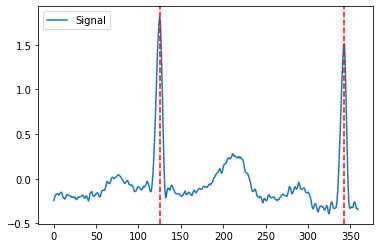

In [16]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [11]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

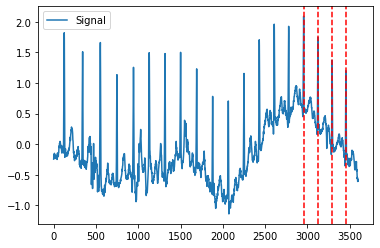

In [38]:
#Solution
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][15:19], ecg[0 : SAMPLING_RATE*10])

**Task 3:** Detect Heartrate. [15 Points]

In [13]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

Heartrate is :102


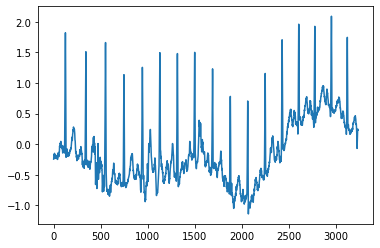

In [32]:
datOf0to10Seconds = ecg[0 : SAMPLING_RATE*9]
plt.plot(datOf0to6Seconds)
rpeaksIn10Seconds = 17
heartrate = rpeaksIn10Seconds * 6 
print("Heartrate is :" +str(heartrate))
##Heart rate is approximately 102 BPM

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [39]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Delineate the ECG signal and visualizing all peaks of ECG complexes


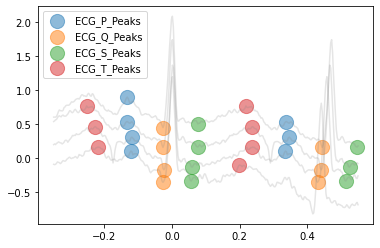

In [40]:
ecg_signal = ecg
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks['ECG_R_Peaks'][15:19], SAMPLING_RATE, show=True, show_type='peaks')

In [15]:
# TODO Does the detection work well?
##Seems well ,but few peaks were not identified.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

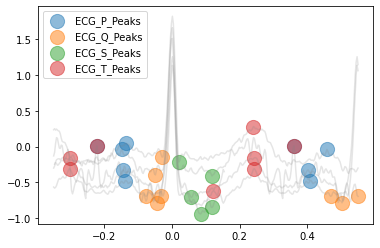

In [45]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
ecg_signal = ecg[0:1000]
_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks['ECG_R_Peaks'][0:5], SAMPLING_RATE, show=True, show_type='peaks')

In [17]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [18]:
# TODO Does the filtering improve the result?

In [19]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#